In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
blinkit_df = pd.read_excel(r"BlinkIT Grocery Data.xlsx", sheet_name="BlinkIT Grocery Data")

In [4]:
blinkit_df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [6]:
blinkit_df.shape

(8523, 12)

In [7]:
blinkit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
blinkit_df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

<Axes: >

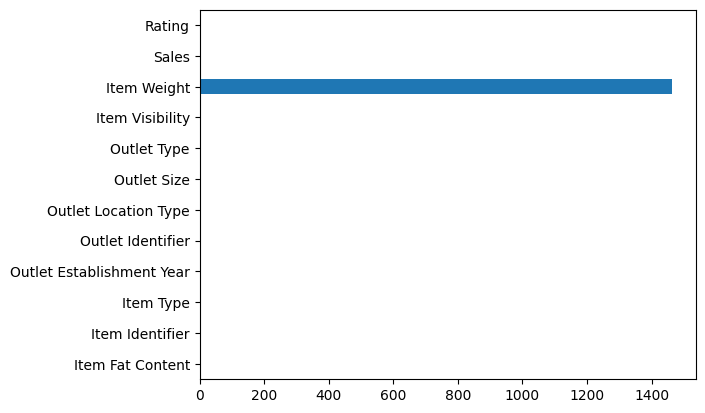

In [11]:
blinkit_df.isnull().sum().plot(kind='barh')

In [15]:
blinkit_df['Item Type'].value_counts()

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [29]:
item_avg_sales = blinkit_df[['Item Type', 'Sales']].groupby('Item Type').mean('Sales').sort_values(by='Sales', ascending=False)

In [30]:
item_avg_sales.head()

,Sales
Item Type,
Household,149.424753
Dairy,148.499211
Starchy Foods,147.838023
Snack Foods,146.194935
Fruits and Vegetables,144.581235


<Axes: xlabel='Sales', ylabel='Item Type'>

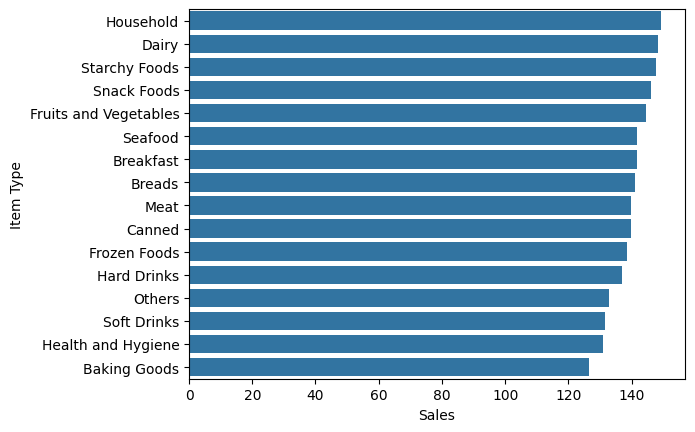

In [31]:
sns.barplot(data=item_avg_sales, y='Item Type' , x='Sales', orient='h')

<Axes: ylabel='Sales'>

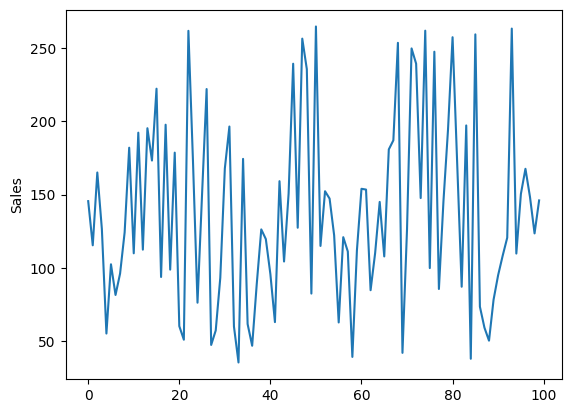

In [ ]:
sns.lineplot(blinkit_df.Sales.head(100))

<Axes: xlabel='Rating'>

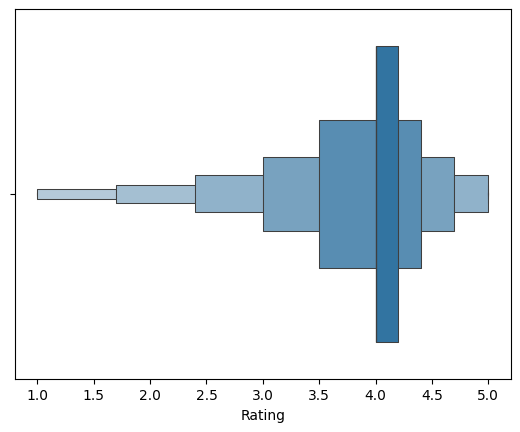

In [40]:
sns.boxenplot(blinkit_df.Rating, orient='h')

<Axes: xlabel='Rating', ylabel='Count'>

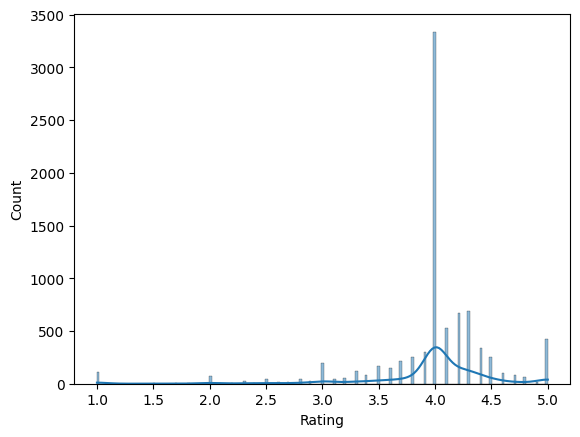

In [41]:
sns.histplot(blinkit_df.Rating, kde=True)

In [42]:
blinkit_df.head(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0


In [43]:
blinkit_df['Rating'].dtype

dtype('float64')

In [44]:
blinkit_df['Rating'].value_counts()

Rating
4.0    3339
4.3     694
4.2     673
4.1     524
5.0     427
4.4     340
3.9     302
4.5     256
3.8     253
3.7     211
3.0     193
3.5     171
3.6     150
3.3     121
1.0     114
4.6     102
3.4      83
4.7      79
2.0      74
4.8      62
3.2      55
2.8      49
3.1      49
2.5      48
2.3      26
2.9      24
2.7      21
4.9      15
2.6      14
1.5      11
2.4      11
2.2       9
1.7       8
1.8       5
2.1       4
1.9       2
1.3       2
1.4       1
1.2       1
Name: count, dtype: int64

In [ ]:
rating_avg_df = blinkit_df[['Item Type', 'Item Fat Content','Rating']].value_counts('Item Type')

sns.barplot(data= rating_avg_df, hue= '')

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Item Type'>

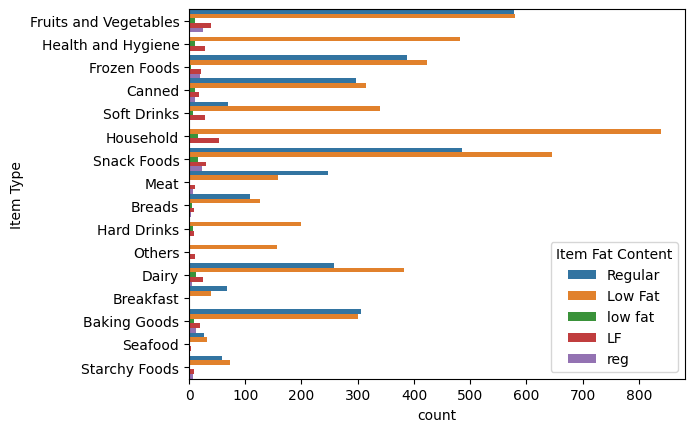

In [54]:
rating_avg_df = blinkit_df[['Item Type', 'Item Fat Content','Rating']]

sns.countplot(data= rating_avg_df,y='Item Type', hue= 'Item Fat Content', width=1, orient='y')